In [ ]:
from google.colab import files
uploaded = files.upload()

Saving amazon_products_dataset.csv to amazon_products_dataset (1).csv


Task 1 — Load & Inspect the Dataset
Load the dataset into your notebook.

Display first and last 5 rows.

Print .shape and .info().

Show list of unique product categories.

Identify columns that require cleaning or type conversion.

In [ ]:
import pandas as pd
df = pd.read_csv('amazon_products_dataset.csv')
print("First 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())
print("\nShape of the DataFrame:",df.shape)
print("\nInfo about the DataFrame:",)
print(df.info())
print("\nUnique product categories:")
print(df['category'].unique())

First 5 rows:
                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  

Last 5 rows:
                               title    brand    category  actual_price  \
1995  Smartphone with AMOLED Display     Dell     Monitor       24140.0   
1996             Smart Fitness Watch       LG  Headphones       65449.0   
1997                4K Action Camera     Dell  Smartphone       21358.0   
1998        Noise Cancelling 

Task 2 — Clean the Dataset

Identify missing values using .isnull().sum().

Fill missing numeric values (discount_price, rating, etc.) using mean or median.

Fill missing categorical values (brand, category) with "Unknown".

Remove all duplicate rows.

Convert numeric columns to their correct data types.

Reset index after cleaning.

In [ ]:
#Identify missing values using .isnull().sum().
print(df.isnull().sum())

title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64


In [ ]:
# Fill numeric missing values with mean
df['actual_price'] = df['actual_price'].fillna(df['actual_price'].mean())
df['discount_price'] = df['discount_price'].fillna(df['discount_price'].mean())
df['rating'] = df['rating'].fillna(df['rating'].mean())
df['rating_count'] = df['rating_count'].fillna(df['rating_count'].mean())

# Fill categorical missing values
df['category'] = df['category'].fillna('Unknown')

# Remove duplicates
df = df.drop_duplicates()

# Reset index
df = df.reset_index(drop=True)

# Verify
print(df.head())
print(df.info())


                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  
0     2.6        2128.0  
1     2.5        9118.0  
2     1.9        2517.0  
3     3.7       17533.0  
4     4.9       14228.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        2000 non-null   object 
 3   actual_price    2000 

Task 3 — Data Analysis

Identify the top 5 most expensive products (actual_price).

Find the brand with the highest number of products.

Compute the average discount percentage for each brand.

Identify products with rating ≥ 4.5 and rating_count ≥ 2000.

Compute category-wise average price.

In [ ]:
#Identify the top 5 most expensive products (actual_price).
top_5=df.nlargest(5, 'actual_price')
print("top 5 most expensive products")
print(top_5)

#Find the brand with the highest number of products.
brand_counts = df['brand'].value_counts()
top_brand = brand_counts.idxmax()
top_count = brand_counts.max()
print(f"\nBrand with the highest number of products: {top_brand} ({top_count} products)")

#Compute the average discount percentage for each brand.
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
avg_discount_by_brand = df.groupby('brand')['discount_percentage'].mean()
print("\nAverage discount percentage for each brand:")
print(avg_discount_by_brand)

#Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
high_rated_products = df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
print("\nProducts with rating ≥ 4.5 and rating_count ≥ 2000:")
print(high_rated_products)

#Compute category-wise average price.
avg_price_by_category = df.groupby('category')['actual_price'].mean()
print("\nCategory-wise average price:")
print(avg_price_by_category)

top 5 most expensive products
                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  discount_percentage  
1383     3.0        7666.0             2.373958  
1974     2.6        5232.0             3.375527  
1403     2.7        1379.0             2.990345  
1351     4.8        7596.0             1.279852  
42       3.8       10252.0             3.641671  

Brand with the highest number of products: Boat (214 products)

Average discount percentage for each brand:
brand
Apple      12.721996
Boat       12.546502
Dell       11.165004
HP         11.501202
JBL        11.370137

Task 4 — Programming Task: Feature Engineering + Logical Filters

Task 4A — Create New Columns

Write code to create:

discount_percent = ((actual_price - discount_price) / actual_price) * 100

price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"

popularity_score = rating * log(rating_count + 1)


In [ ]:
import numpy as np
# 1. discount_percent
df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

# 2. price_category
df['price_category'] = pd.cut(
    df['actual_price'],
    bins=[0, 500, 2000, float('inf')],
    labels=['Budget', 'Midrange', 'Premium'],
    right=False  # include left boundary
)

# 3. popularity_score = rating * log(rating_count + 1)
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)

# Display updated dataframe
print(df.head())

                     title    brand    category  actual_price  discount_price  \
0      Smart Fitness Watch     Dell      Laptop       69890.0         65271.0   
1  Laptop with SSD Storage       LG  Smartwatch       66771.0         63977.0   
2  High Resolution Monitor       Mi  Headphones       43598.0         39679.0   
3         4K Action Camera       HP      Camera       63408.0         58877.0   
4      Smart Fitness Watch  Samsung     Monitor       49224.0         45017.0   

   rating  rating_count  discount_percentage  discount_percent price_category  \
0     2.6        2128.0             6.608957          6.608957        Premium   
1     2.5        9118.0             4.184451          4.184451        Premium   
2     1.9        2517.0             8.988944          8.988944        Premium   
3     3.7       17533.0             7.145786          7.145786        Premium   
4     4.9       14228.0             8.546644          8.546644        Premium   

   popularity_score  
0   

Task 4B — Filtering Using New Columns

Using the newly created columns:

Show top 10 highest popularity_score products.

Show all Premium category items with discount_percent > 40%.

Show all products whose title contains "Bluetooth" (string filter).

Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())

In [ ]:
# --- 1. Top 10 highest popularity_score products ---
top10_popular = df.sort_values(by='popularity_score', ascending=False).head(10)
print("Top 10 products by popularity_score:")
print(top10_popular)


# --- 2. Premium items with discount_percent > 40% ---
premium_high_discount = df[(df['price_category'] == 'Premium') &
                           (df['discount_percent'] > 40)]
print("\nPremium category items with discount_percent > 40%:")
print(premium_high_discount)


# --- 3. Products whose title contains 'Bluetooth' ---
bluetooth_products = df[df['title'].str.contains("Bluetooth", case=False, na=False)]
print("\nProducts with 'Bluetooth' in title:")
print(bluetooth_products)


# --- 4. rating ≥ 4.0 AND discount_percent between 20–50 AND popularity_score in top 30% ---
pop_threshold = df['popularity_score'].quantile(0.70)  # Top 30%

filtered_products = df[
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50)) &
    (df['popularity_score'] >= pop_threshold)
]

print("\nFiltered products (rating ≥ 4, discount 20–50%, popularity top 30%):")
print(filtered_products)


Top 10 products by popularity_score:
                               title    brand    category  actual_price  \
1418  Smartphone with AMOLED Display  OnePlus      Laptop       22786.0   
297       Portable Bluetooth Speaker  Samsung      Camera       52713.0   
502    Wireless Bluetooth Headphones  Samsung      Camera       17858.0   
1400         High Resolution Monitor     Dell  Headphones       11025.0   
878          Laptop with SSD Storage    Apple  Smartwatch        4436.0   
1489         High Resolution Monitor    Apple      Laptop       21711.0   
848          High Resolution Monitor       HP  Smartphone       11660.0   
854       Portable Bluetooth Speaker  Samsung  Smartwatch       19284.0   
1625                   Gaming Laptop     Dell      Tablet       15099.0   
637                 4K Action Camera     Dell  Headphones       35058.0   

      discount_price  rating  rating_count  discount_percentage  \
1418         22301.0     5.0       18510.0             2.128500   
297

Task 4C — Grouping with New Columns

Find the average discount_percent for each brand.

Find the average popularity_score for each price_category.

Identify which category offers the highest average discount.

Calculate total revenue potential per brand using:

revenue_potential = actual_price * rating_count

In [ ]:
# --- 1. Average discount_percent for each brand ---
avg_discount_by_brand = df.groupby('brand')['discount_percent'].mean()
print("Average discount_percent for each brand:")
print(avg_discount_by_brand)


# --- 2. Average popularity_score for each price_category ---
avg_popularity_by_pricecat = df.groupby('price_category')['popularity_score'].mean()
print("\nAverage popularity_score for each price_category:")
print(avg_popularity_by_pricecat)


# --- 3. Category with the highest average discount ---
highest_discount_category = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False).head(1)
print("\nCategory with highest average discount:")
print(highest_discount_category)


# --- 4. Total revenue potential per brand ---
df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_per_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
print("\nTotal revenue potential per brand:")
print(revenue_per_brand)


Average discount_percent for each brand:
brand
Apple      12.721996
Boat       12.546502
Dell       11.165004
HP         11.501202
JBL        11.370137
LG         11.968799
Mi         10.162308
OnePlus    11.380987
Samsung     9.302573
Sony       10.388873
Name: discount_percent, dtype: float64

Average popularity_score for each price_category:
price_category
Budget      38.147220
Midrange    23.660324
Premium     26.366914
Name: popularity_score, dtype: float64

Category with highest average discount:
category
Headphones    12.602766
Name: discount_percent, dtype: float64

Total revenue potential per brand:
brand
HP         8.297444e+10
OnePlus    8.247380e+10
LG         8.158494e+10
Samsung    8.117230e+10
Sony       7.930446e+10
Boat       7.744874e+10
JBL        7.723438e+10
Mi         7.698029e+10
Dell       7.549826e+10
Apple      6.706084e+10
Name: revenue_potential, dtype: float64


/tmp/ipython-input-245142307.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity_by_pricecat = df.groupby('price_category')['popularity_score'].mean()


Task 5 — Data Visualization

Use the specific plot type mentioned:

Price distribution → Histogram + KDE

Relationship between price and rating → Scatter Plot

Category-wise average rating → Bar Plot

Brand product count → Count Plot

Numeric feature correlations → Heatmap

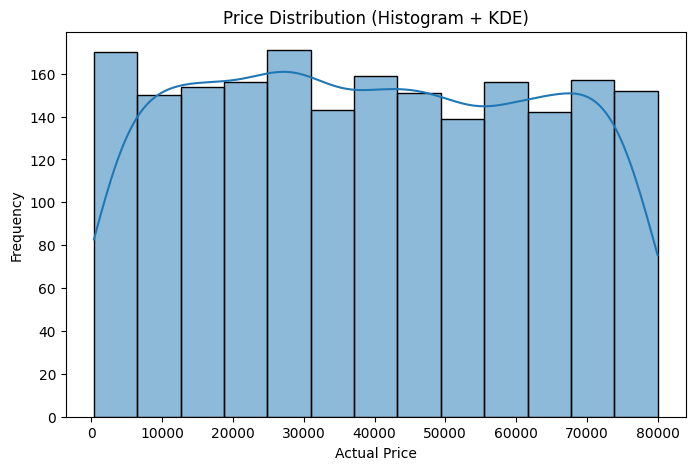

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Price distribution → Histogram + KDE
plt.figure(figsize=(8,5))
sns.histplot(df['actual_price'], kde=True)
plt.title("Price Distribution (Histogram + KDE)")
plt.xlabel("Actual Price")
plt.ylabel("Frequency")
plt.show()


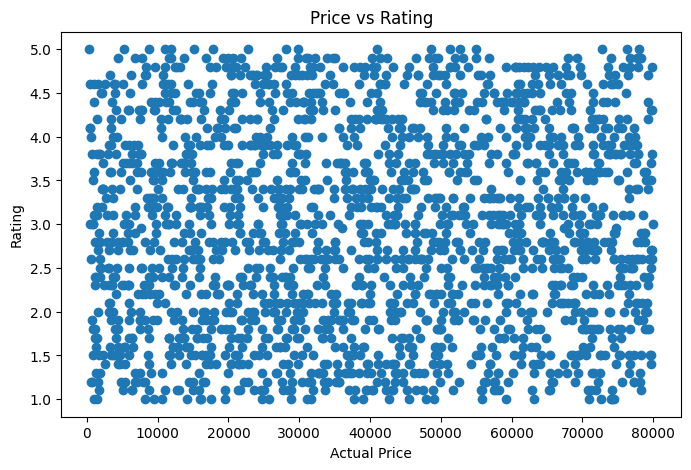

In [ ]:
#Relationship between price and rating → Scatter Plot
plt.figure(figsize=(8,5))
plt.scatter(df['actual_price'], df['rating'])
plt.title("Price vs Rating")
plt.xlabel("Actual Price")
plt.ylabel("Rating")
plt.show()


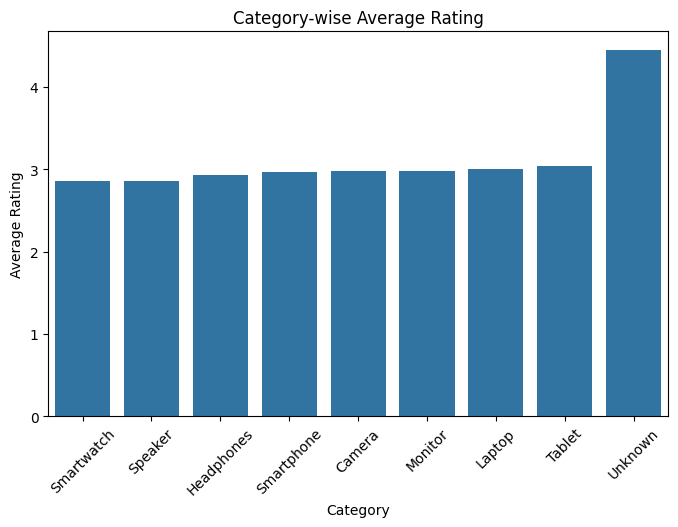

In [ ]:
#Category-wise average rating → Bar Plot
plt.figure(figsize=(8,5))
avg_rating = df.groupby('category')['rating'].mean().sort_values()
sns.barplot(x=avg_rating.index, y=avg_rating.values)
plt.title("Category-wise Average Rating")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


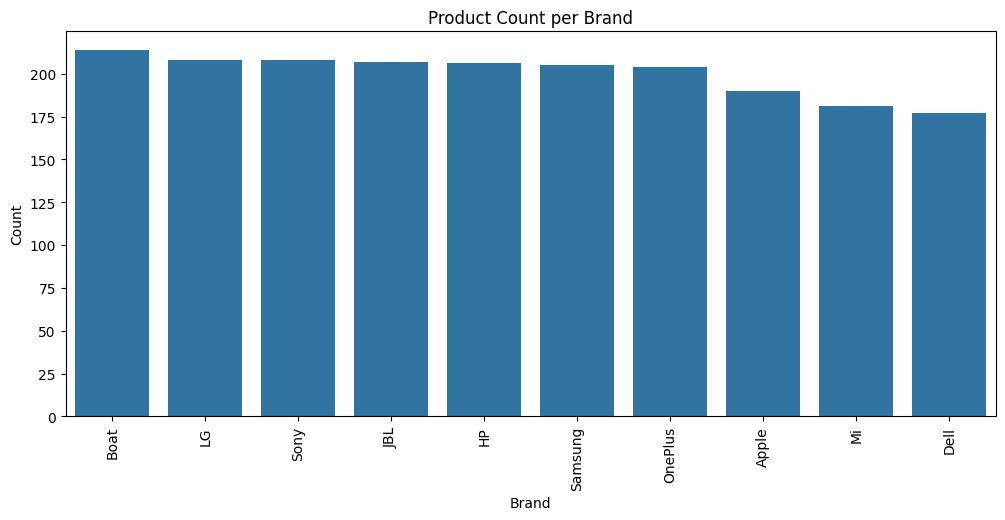

In [ ]:
#Brand product count → Count Plot
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title("Product Count per Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()


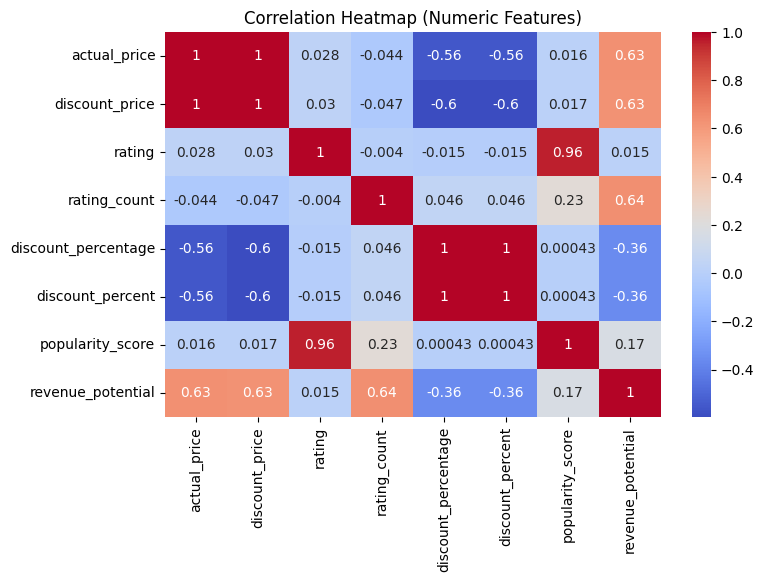

In [ ]:
#Numeric feature correlations → Heatmap
plt.figure(figsize=(8,5))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [ ]:
# Export to CSV
df.to_csv('cleaned_amazon_products_dataset.csv', index=False)
files.download('cleaned_amazon_products_dataset.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df1=pd.read_csv("cleaned_amazon_products_dataset.csv")
df1.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percentage,discount_percent,price_category,popularity_score,revenue_potential
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,6.608957,Premium,19.924860,1.487259e+08
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,4.184451,Premium,22.795289,6.088180e+08
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,8.988944,Premium,14.879318,1.097362e+08
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,7.145786,Premium,36.156019,1.111732e+09
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,8.546644,Premium,46.858883,7.003591e+08


In [ ]:
print(df1.isnull().sum())

title                  0
brand                  0
category               0
actual_price           0
discount_price         0
rating                 0
rating_count           0
discount_percentage    0
discount_percent       0
price_category         0
popularity_score       0
revenue_potential      0
dtype: int64
